# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [69]:
import pandas as pd 
from matplotlib import pyplot as plt # importar librerías

In [70]:
df_cart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep = ';')
df_products = pd.read_csv("/datasets/products.csv", sep = ';')
df_aisles = pd.read_csv("/datasets/aisles.csv", sep = ';') 
df_departments = pd.read_csv("/datasets/departments.csv", sep = ';')
df_order_products = pd.read_csv("/datasets/order_products.csv", sep = ';') # leer conjuntos de datos en los DataFrames

In [71]:
print(df_cart_orders.info()) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [72]:
print(df_products.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [73]:
print(df_aisles.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [74]:
print(df_departments.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [75]:
print(df_order_products.info(show_counts=True)) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
###### Revisé los archivos y están separados por ';' por lo tanto agregué la función sep="". Hay alunos valores nulos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

###### Corregir tipos de datos
+ Revisar tipos con df.info().
+ Convertir IDs a enteros, fechas a datetime, etc.

###### Manejar valores ausentes
+ Identificarlos con df.isnull().sum().
+ Rellenar numéricos con media/mediana, categóricos con valor más frecuente o "Desconocido".

###### Eliminar duplicados
+ Contar con df.duplicated().sum().
+ Eliminar registros repetidos con df.drop_duplicates().

###### Explicar resultados
+ Qué errores se encontraron y cómo se corrigieron.
+ Posibles causas de valores ausentes/duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [126]:
# Revisa si hay pedidos duplicados
print(f"Pedidos duplicados: {df_cart_orders['order_id'].duplicated().sum()}")

Pedidos duplicados: 0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 
###### No hay pedidos únicos duplicados

In [127]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = df_cart_orders[
    (df_cart_orders['order_dow'] == 3) &  
    (df_cart_orders['order_hour_of_day'] == 2)
]

print(pedidos_miercoles_2am)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
###### Estos datos muestran que hay un grupo de usuarios que compra los miércoles a las 2:00 a.m., muchos de ellos clientes con patrones de compra diversos. Para un negocio, esto podría implicar oportunidades de optimización en promociones, atención al cliente o logística.

In [128]:
# Elimina los pedidos duplicados
df_cart_orders= df_cart_orders.drop_duplicates()

In [129]:
print(f"Filas duplicadas: {df_cart_orders.duplicated().sum()}")
# Vuelve a verificar si hay filas duplicadas


Filas duplicadas: 0


In [130]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(f"ID duplicados: {df_cart_orders['order_id'].duplicated().sum()}")

ID duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

###### 15 valores duplicados de 121 no generan un gran impacto en los resultados si los eliminamos.

### `products` data frame

In [131]:
# Verifica si hay filas totalmente duplicadas
print(f"Filas duplicadas: {df_products.duplicated().sum()}")


Filas duplicadas: 0


In [132]:
# Revisa únicamente si hay ID de departamentos duplicados
print(f"Filas duplicadas: {df_products['department_id'].duplicated().sum()}")

Filas duplicadas: 49673


In [133]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print(f"Nombres duplicados: {df_products['product_name'].duplicated().sum()}")

Nombres duplicados: 1361


In [134]:
# Revisa si hay nombres duplicados de productos no faltantes
productos_no_faltantes = df_products[df_products['product_name'].notna()]['product_name'].duplicated().sum()
print(f"Número de productos: {productos_no_faltantes}")


Número de productos: 1361


Describe brevemente tus hallazgos y lo que hiciste con ellos.


### `departments` data frame

In [135]:
# Revisa si hay filas totalmente duplicadas
departments_dup = df_departments.duplicated().sum()
print(f"Filas duplicadas: {departments_dup}")

Filas duplicadas: 0


In [136]:
# Revisa únicamente si hay IDs duplicadas de productos
departments_id_dup = df_departments['department_id'].duplicated().sum()
print(f"Filas duplicadas: {departments_id_dup}")

Filas duplicadas: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### No se hallaron departamentos duplicados

### `aisles` data frame

In [137]:
# Revisa si hay filas totalmente duplicadas
aisles_dup = df_aisles.duplicated().sum()
print(f"Filas duplicadas: {aisles_dup}")

Filas duplicadas: 0


In [138]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles_id_dup = df_aisles['aisle_id'].duplicated().sum()
print(f"IDs duplicados: {aisles_id_dup}")

IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

###### No se halaron duplicados

### `order_products` data frame

In [89]:
# Revisa si hay filas totalmente duplicadas
order_dup = df_order_products.duplicated().sum()
print(f"Filas duplicadas: {order_dup}")

Filas duplicadas: 0


In [90]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(f"Pedidos duplicados: {df_order_products['order_id'].duplicated().sum()}")

Pedidos duplicados: 4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.

###### Hay ordenes repetidas pero no las voy a eliminar porque es muy seguro que se repitan por ser una misma compra pero distintos productos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [91]:
# Encuentra los valores ausentes en la columna 'product_name'
print(f"Valores ausentes: {df_products['product_name'].isna().sum()}")

Valores ausentes: 1258


Describe brevemente cuáles son tus hallazgos.
###### Faltan algunos nombres

In [92]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_by_aisle = df_products.groupby('aisle_id')['product_name'].apply(lambda x: x.isna().sum())

# Filtré pasillos con más de 1 dato faltante
missing_by_aisle = missing_by_aisle[missing_by_aisle > 1]

print(missing_by_aisle)


aisle_id
100    1258
Name: product_name, dtype: int64


Describe brevemente cuáles son tus hallazgos.
###### Todos los datos faltantes se encuentran en el pasillo 100

In [93]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

missing_products = df_products[df_products['product_name'].isna()]

# Verificar si están relacionados con el departamento con ID 21
related_to_21 = missing_products['department_id'] == 21

if related_to_21.all():
    print("Todos los productos faltantes están relacionados con el departamento con ID 21.")
elif related_to_21.any():
    print("Algunos productos faltantes están relacionados con el departamento con ID 21.")
else:
    print("Ningún producto faltante está relacionado con el departamento con ID 21.")


Todos los productos faltantes están relacionados con el departamento con ID 21.


Describe brevemente cuáles son tus hallazgos.
###### Están relacionados con el departamento con ID 21

In [94]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = df_aisles[df_aisles['aisle_id']==100]
department_21 = df_departments[df_departments['department_id']==21]

print('Datos relacionados con el pasillo ID 100')
print(aisle_100)
print()
print('Datos relacionados con el departamento ID 21')
print(department_21)

Datos relacionados con el pasillo ID 100
    aisle_id    aisle
99       100  missing

Datos relacionados con el departamento ID 21
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
###### Tanto el departamento 21 como el pasillo 100 están marcados con 'missing' lo que indica que no se tiene información sobre ellos.

In [95]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(f"Valores ausentes: {df_products['product_name'].isna().sum()}")

Valores ausentes: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### Se reemplazaron los valores ausentes.

### `orders` data frame

In [96]:
# Encuentra los valores ausentes
print(f"Valores ausentes: {df_cart_orders.isna().sum()}")

Valores ausentes: order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [97]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Filtrar los datos faltantes en 'days_since_prior_order' que no sean del primer pedido
missing_not_first_order = df_cart_orders[(df_cart_orders['days_since_prior_order'].isna()) & (df_cart_orders['order_number'] != 1)]

print(missing_not_first_order)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### El resultado indica que no hay filas que cumplan con ambas condiciones: tener valores faltantes en la columna days_since_prior_order y no ser el primer pedido del cliente

### `order_products` data frame

In [98]:
# Encuentra los valores ausentes
print(f"Valores ausentes: {df_order_products.isna().sum()}")

Valores ausentes: order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [99]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"El valor mínimo de esa columna es: {df_order_products['add_to_cart_order'].min()}. Y el valor máximo es: {df_order_products['add_to_cart_order'].max()}")

El valor mínimo de esa columna es: 1.0. Y el valor máximo es: 64.0


Describe brevemente cuáles son tus hallazgos.
###### El valor mínimo de 1 significa que siempre hay un primer producto añadido al carrito, y el valor máximo de 64 indica que, en algún caso, se añadieron hasta 64 productos en un solo pedido.

In [100]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_missing = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id']

In [101]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

missing_orders = df_order_products[df_order_products['add_to_cart_order'].isnull()]

product_count_by_order = missing_orders.groupby('order_id')['product_id'].count()

min_product_count = product_count_by_order.min()

print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos? {min_product_count > 64}")
print(f"El valor mínimo del conteo es: {min_product_count}")


¿Todos los pedidos con valores ausentes tienen más de 64 productos? False
El valor mínimo del conteo es: 1


Describe brevemente cuáles son tus hallazgos.
###### No todos los pedidos con valores ausentes tienen más de 64 productos, ya que el pedido con menos productos tiene solo 1 artículo.

In [102]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
###### Se remplazaron los valores ausentes en la columna add_to_cart_order con el valor 999 y se convirtió toda la columna a tipo entero para garantizar que los datos sean consistentes y adecuados para análisis.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
###### En este procesamiento logramos identificar y anejar valores ausentes y limpiar datos para facilitar su análisis. Esto garantiza que los datos sean consistentes, limpios y adecuados para análisis posteriores.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [103]:
# Verificar valores razonables en 'order_hour_of_day'
invalid_hour = df_cart_orders[~df_cart_orders['order_hour_of_day'].between(0, 23)]

# Verificar valores razonables en 'order_dow'
invalid_dow = df_cart_orders[~df_cart_orders['order_dow'].between(0, 6)]

# Mostrar resultados
if invalid_hour.empty and invalid_dow.empty:
    print("Todos los valores en 'order_hour_of_day' y 'order_dow' están dentro de los rangos razonables.")
else:
    print("Valores fuera de rango encontrados:")
    print(f"Valores fuera de rango en 'order_hour_of_day':\n{invalid_hour}")
    print(f"Valores fuera de rango en 'order_dow':\n{invalid_dow}")


Todos los valores en 'order_hour_of_day' y 'order_dow' están dentro de los rangos razonables.


Escribe aquí tus conclusiones


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

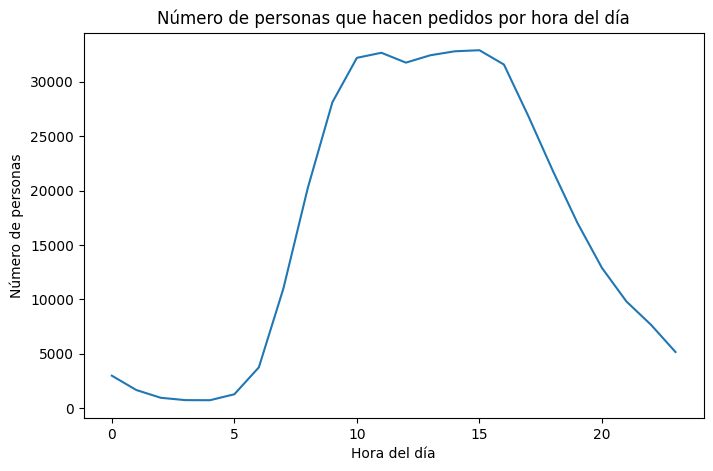

In [104]:
order_counts = df_cart_orders.groupby('order_hour_of_day')['user_id'].nunique()
order_counts.plot(x='order_hour_of_day',
                    y='order_counts',
                    title = 'Número de personas que hacen pedidos por hora del día',
                    xlabel = 'Hora del día',
                    ylabel = 'Número de personas',
                    figsize = (8, 5))
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
plt.show()

Escribe aquí tus conclusiones

###### Una fuerte cantidad de clientes haccen sus compras en un horario de 9 hrs a 17 hrs.

### [A3] ¿Qué día de la semana compran víveres las personas?

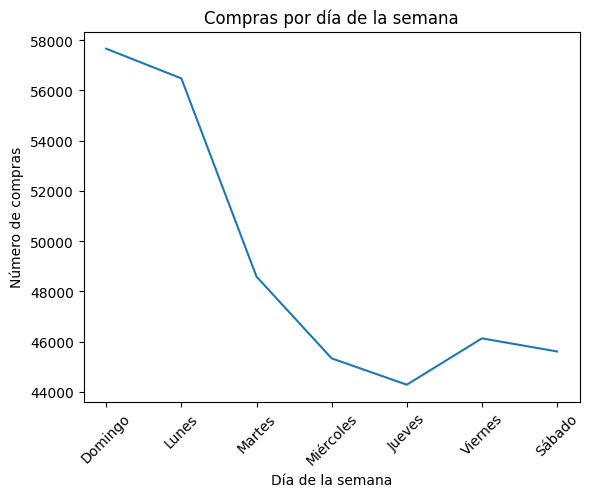

In [105]:
days_of_week = {
    0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles',
    4: 'Jueves', 5: 'Viernes', 6: 'Sábado'
}

order_per_day = df_cart_orders.groupby('order_dow')['user_id'].nunique()
order_per_day.index = order_per_day.index.map(days_of_week)
order_per_day.plot(x='order_dow',
                   y='order_per_day',
                   title = 'Compras por día de la semana',
                   xlabel = 'Día de la semana',
                   ylabel = 'Número de compras',
                   rot = 45)

plt.show()

Escribe aquí tus conclusiones

###### Domingo y Lunes es cuando más compran víveres, seguramente para estar listos para la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

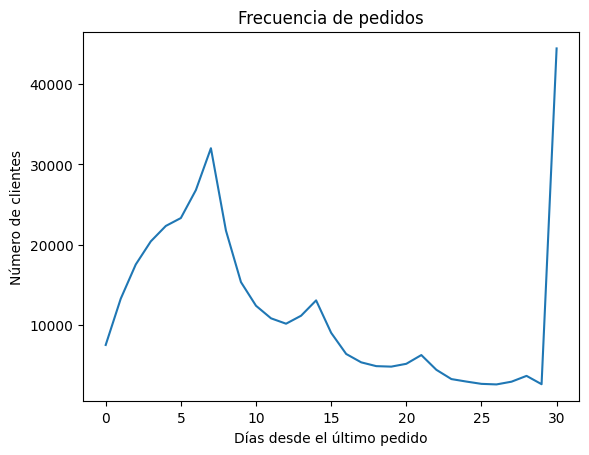

In [106]:
time_for_next_order = df_cart_orders.groupby('days_since_prior_order')['user_id'].nunique()
time_for_next_order.plot(title = 'Frecuencia de pedidos',
                         x='days_since_prior_order',
                         y='time_for_next_order',
                         xlabel='Días desde el último pedido',
                         ylabel='Número de clientes')
plt.show()

Escribe aquí tus conclusiones

##### Explicación: 
+ Valor mínimo: Parece haber un pico en valores bajos (1-7 días), lo que indica que muchas personas hacen pedidos semanales.
+ Valor máximo: Hay un pico fuerte en el día 30, lo que sugiere que muchos clientes compran mensualmente (posiblemente después de recibir su salario o ajustar su presupuesto mensual).

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [107]:
# Primero voy a crear un subconjunto
df_wednesday = df_cart_orders[df_cart_orders['order_dow'] == 3]
df_saturday = df_cart_orders[df_cart_orders['order_dow']== 6]

In [108]:
# Cuántos pedidos se hicieron por cada día
wednesday_orders = df_wednesday['order_hour_of_day'].value_counts().sort_index()
saturday_orders = df_saturday['order_hour_of_day'].value_counts().sort_index()

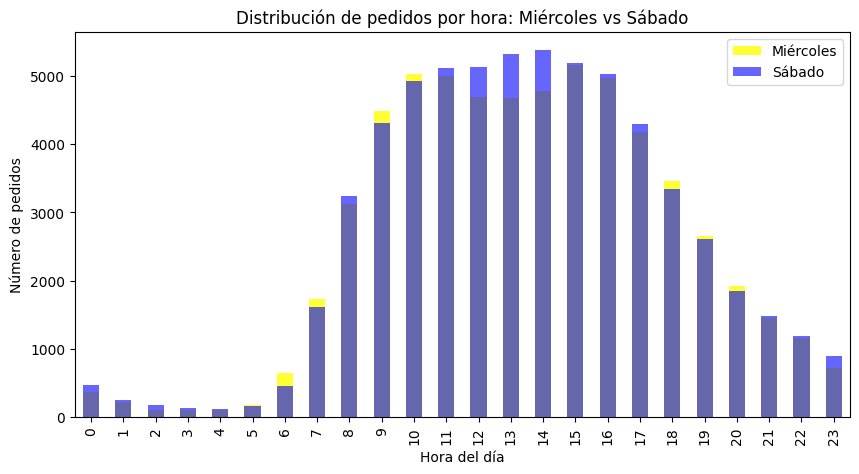

In [109]:
# Ahora el gráfico
wednesday_orders.plot(kind='bar', alpha=0.8, label='Miércoles', figsize=(10,5), 
                      title='Distribución de pedidos por hora: Miércoles vs Sábado', 
                      xlabel='Hora del día', ylabel='Número de pedidos', xticks=range(0,24), color='yellow'); 

saturday_orders.plot(kind='bar', alpha=0.6, label='Sábado', color='blue'); 

plt.legend(); plt.show()

Escribe aquí tus conclusiones
###### No hay mucha diferencia, sin embargo podemos ver que los sábados entre las 11 hrs y las 14 hrs hay un aumento en la cantidad de compras

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

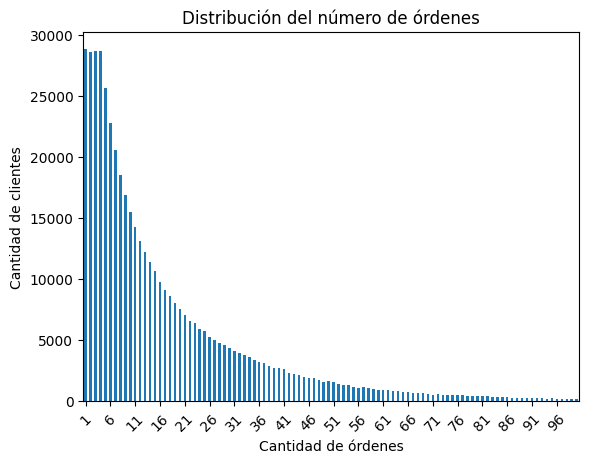

In [110]:
number_of_orders = df_cart_orders.groupby('order_number')['user_id'].nunique()
number_of_orders.plot(title = 'Distribución del número de órdenes',
                         x='order_number',
                         y='number_of_orders',
                         xlabel='Cantidad de órdenes',
                         ylabel='Cantidad de clientes',
                         kind='bar')
plt.xticks(range(0, len(number_of_orders), 5), rotation=45) 
plt.show()

Escribe aquí tus conclusiones
###### Cerca del 10% del total de los clientes hacen en tre 1 y 10 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [111]:
top_products = df_order_products['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'count']

In [112]:
top_products = top_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

In [113]:
print(top_products.head(20))

    product_id  count              product_name
0        24852  66050                    BANANA
1        13176  53297    BAG OF ORGANIC BANANAS
2        21137  37039      ORGANIC STRAWBERRIES
3        21903  33971      ORGANIC BABY SPINACH
4        47209  29773      ORGANIC HASS AVOCADO
5        47766  24689           ORGANIC AVOCADO
6        47626  21495               LARGE LEMON
7        16797  20018              STRAWBERRIES
8        26209  19690                     LIMES
9        27845  19600        ORGANIC WHOLE MILK
10       27966  19197       ORGANIC RASPBERRIES
11       22935  15898      ORGANIC YELLOW ONION
12       24964  15292            ORGANIC GARLIC
13       45007  14584          ORGANIC ZUCCHINI
14       39275  13879       ORGANIC BLUEBERRIES
15       49683  13675            CUCUMBER KIRBY
16       28204  12544        ORGANIC FUJI APPLE
17        5876  12232             ORGANIC LEMON
18        8277  11993  APPLE HONEYCRISP ORGANIC
19       40706  11781    ORGANIC GRAPE T

Escribe aquí tus conclusiones
###### Podemos ver que los clientes tienen preferencia por productos orgánicos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [114]:
# Necesito ver en order_products, order_id que son los pedidos únicos y contar en product_id la cantidad de productos
# Cuántos pedidos tienen 1 articulo, cuántos tienen 2 y así

order_size = df_order_products.groupby('order_id').size()

In [115]:
# Esto para ver las estádisticas generales
print(order_size.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


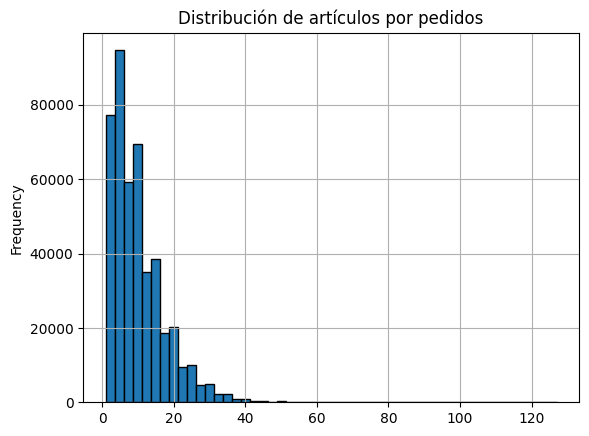

In [116]:
order_size.plot(title='Distribución de artículos por pedidos',
                xlabel='Número de artículos por pedido',
                ylabel='Frecuencia',
                grid = True,
                kind = 'hist',
                edgecolor='black',
                bins=50)
plt.show()

Escribe aquí tus conclusiones
###### Los pedidos rondan entre 1 (min) y 10 productos (promedio).

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [117]:
# Revisar en order_products, la columnda reordered muestra 1 si el producto ya se ha ordenado antes
reordered_products = df_order_products[df_order_products['reordered']== 1]
reordered_products = reordered_products.groupby('product_id').size().sort_values(ascending=False)

In [118]:
# Mostrar los nombres
top_reordered_products = reordered_products.head(20).reset_index()
top_reordered_products = top_reordered_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

In [119]:
print(top_reordered_products)

    product_id      0              product_name
0        24852  55763                    BANANA
1        13176  44450    BAG OF ORGANIC BANANAS
2        21137  28639      ORGANIC STRAWBERRIES
3        21903  26233      ORGANIC BABY SPINACH
4        47209  23629      ORGANIC HASS AVOCADO
5        47766  18743           ORGANIC AVOCADO
6        27845  16251        ORGANIC WHOLE MILK
7        47626  15044               LARGE LEMON
8        27966  14748       ORGANIC RASPBERRIES
9        16797  13945              STRAWBERRIES
10       26209  13327                     LIMES
11       22935  11145      ORGANIC YELLOW ONION
12       24964  10411            ORGANIC GARLIC
13       45007  10076          ORGANIC ZUCCHINI
14       49683   9538            CUCUMBER KIRBY
15       28204   8989        ORGANIC FUJI APPLE
16        8277   8836  APPLE HONEYCRISP ORGANIC
17       39275   8799       ORGANIC BLUEBERRIES
18        5876   8412             ORGANIC LEMON
19       49235   8389       ORGANIC HALF

Escribe aquí tus conclusiones
##### Volvemos a confirmar que los clientes prefieren los productos que son orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [120]:
# Total de veces que cada producto ha sido pedido
total_orders = df_order_products.groupby('product_id').size()

# Total de veces que cada producto ha sido reordenado
reordered_products = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()

In [121]:
# Calcular la tasa de repetición (reordenados / total pedidos)
reorder_rate = (reordered_products / total_orders).fillna(0)

# Convertir en DataFrame y ordenar de mayor a menor
reorder_rate = reorder_rate.reset_index().rename(columns={0: 'reorder_rate'}).sort_values(by='reorder_rate', ascending=False)

In [122]:
# Mostrar los primeros productos con mayor tasa de repetición
print(reorder_rate.head(20))

       product_id  reorder_rate
13453       14721           1.0
19195       20949           1.0
6136         6723           1.0
6144         6732           1.0
41319       45088           1.0
41310       45078           1.0
19258       21016           1.0
19248       21005           1.0
32273       35192           1.0
32277       35197           1.0
6211         6810           1.0
41274       45040           1.0
41269       45035           1.0
25120       27373           1.0
28203       30748           1.0
41265       45031           1.0
32224       35137           1.0
28202       30747           1.0
32304       35228           1.0
32305       35229           1.0


Escribe aquí tus conclusiones

###### Todos los productos en la lista tienen una tasa de repetición del 100% (1.0), lo que significa que cada vez que fueron pedidos, ya habían sido comprados antes. Son productos altamente recurrentes, es decir, los clientes que los compran suelen repetir la compra.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [123]:
# Unir df_order_products con df_cart_orders para obtener el user_id en cada pedido
df_merged = df_order_products.merge(df_cart_orders[['order_id', 'user_id']], on='order_id', how='left')

# Contar cuántos productos en total ha pedido cada usuario
total_orders_per_user = df_merged.groupby('user_id').size()

In [124]:
# Contar cuántos productos ya habían sido pedidos antes por cada usuario
reordered_orders_per_user = df_merged[df_merged['reordered'] == 1].groupby('user_id').size()

# Calcular la tasa de repetición (productos repetidos / total de productos pedidos)
repeat_rate_per_user = (reordered_orders_per_user / total_orders_per_user).fillna(0)

# Convertirlo en un DataFrame para visualizar mejor
repeat_rate_per_user = repeat_rate_per_user.reset_index()
repeat_rate_per_user.columns = ['user_id', 'reorder_rate']
print(repeat_rate_per_user.head(10))

   user_id  reorder_rate
0        2      0.038462
1        4      0.000000
2        5      0.666667
3        6      0.000000
4        7      0.928571
5       11      0.200000
6       12      0.250000
7       13      0.565217
8       14      0.360656
9       15      0.538462


Escribe aquí tus conclusiones

###### Conclusiones sencillas y cortas:  

- Algunos usuarios (como el **7**) casi siempre repiten sus compras (92.8%).  
- Otros (como el **4 y el 6**) nunca han repetido un producto (0%).  
- La tasa de repetición varía bastante entre usuarios, lo que sugiere que algunos tienen hábitos de compra más constantes que otros.  
- Usuarios como el **5 y el 12** repiten productos en **~20-25%** de los casos, lo que indica una mezcla entre productos nuevos y habituales.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [125]:
# Filtrar los productos que fueron los primeros en añadirse al carrito
first_added_products = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar cuántas veces cada producto fue el primero en añadirse
first_added_counts = first_added_products.groupby('product_id').size().reset_index(name='count')

# Ordenar los productos por la cantidad de veces que fueron los primeros en añadirse
top_first_added = first_added_counts.sort_values(by='count', ascending=False).head(20)

# Unir con df_products para obtener los nombres de los productos
top_first_added = top_first_added.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los 20 principales productos
print(top_first_added)


    product_id  count                 product_name
0        24852  15562                       BANANA
1        13176  11026       BAG OF ORGANIC BANANAS
2        27845   4363           ORGANIC WHOLE MILK
3        21137   3946         ORGANIC STRAWBERRIES
4        47209   3390         ORGANIC HASS AVOCADO
5        21903   3336         ORGANIC BABY SPINACH
6        47766   3044              ORGANIC AVOCADO
7        19660   2336                 SPRING WATER
8        16797   2308                 STRAWBERRIES
9        27966   2024          ORGANIC RASPBERRIES
10       44632   1914   SPARKLING WATER GRAPEFRUIT
11       49235   1797          ORGANIC HALF & HALF
12       47626   1737                  LARGE LEMON
13         196   1733                         SODA
14       38689   1397     ORGANIC REDUCED FAT MILK
15       26209   1370                        LIMES
16       12341   1340                HASS AVOCADOS
17        5785   1310  ORGANIC REDUCED FAT 2% MILK
18       27086   1309          

Escribe aquí tus conclusiones
###### La mayoría de los productos que los clientes agregan primero a sus carritos son frutas y productos orgánicos, como plátanos, fresas, aguacates y leche orgánica. Esto sugiere que los compradores suelen comenzar sus compras con productos básicos y saludables.

### Conclusion general del proyecto:

### Conclusiones generales del proyecto:  

1. **Los productos más comprados son alimentos básicos y saludables:**  
   Los artículos más frecuentes en los carritos y los más reordenados incluyen plátanos, fresas, leche y espinacas orgánicas, lo que indica una preferencia por productos frescos y saludables.  

2. **Muchos clientes son leales a ciertos productos:**  
   Se observa que una gran parte de los productos tienen una alta tasa de reorden, lo que sugiere que los consumidores suelen comprar los mismos productos en repetidas ocasiones.  

3. **El comportamiento de compra sigue patrones definidos:**  
   Los clientes tienden a realizar pedidos en ciertos horarios del día, con diferencias entre los días de la semana. Además, los productos agregados primero al carrito suelen ser esenciales para el hogar.  

4. **Algunos clientes reordenan casi todos sus productos, mientras que otros experimentan más:**  
   La tasa de repetición de pedidos varía por usuario. Algunos consumidores repiten casi todas sus compras, mientras que otros prueban productos nuevos con más frecuencia.  

5. **La información puede ayudar a optimizar estrategias de negocio:**  
   Con estos datos, una tienda podría personalizar recomendaciones, mejorar el inventario y diseñar estrategias de marketing basadas en los hábitos de compra de los clientes.  
